In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Spotify-2000.csv" )

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.shape

(1994, 15)

In [5]:
df = df.dropna(axis=1, how='all')

In [6]:
threshold = len(df) * 0.6 
df = df.dropna(axis=1, thresh=threshold)

In [7]:
df.shape

(1994, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [9]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [10]:
df["Top Genre"].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [12]:
column_names = df.columns.tolist()
formatted_column_names = ', '.join(f"'{col}'" for col in column_names)
print(formatted_column_names)

'Index', 'Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'


In [13]:
for column in df.columns:
    if column != 'Index': 
        value_counts = df[column].value_counts()
        num_categories = len(value_counts)
        
        # İki alt kategorisi varsa 0 ve 1 olarak kodlayalım
        if num_categories == 2:
            category_mapping = {category: index for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)
        # İki alt kategoriden fazlaysa 1'den başlayan sıralı sayılarla kodlayalım
        else:
            category_mapping = {category: index + 1 for index, category in enumerate(value_counts.index)}
            df[column] = df[column].map(category_mapping)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Index                   1994 non-null   int64
 1   Title                   1994 non-null   int64
 2   Artist                  1994 non-null   int64
 3   Top Genre               1994 non-null   int64
 4   Year                    1994 non-null   int64
 5   Beats Per Minute (BPM)  1994 non-null   int64
 6   Energy                  1994 non-null   int64
 7   Danceability            1994 non-null   int64
 8   Loudness (dB)           1994 non-null   int64
 9   Liveness                1994 non-null   int64
 10  Valence                 1994 non-null   int64
 11  Length (Duration)       1994 non-null   int64
 12  Acousticness            1994 non-null   int64
 13  Speechiness             1994 non-null   int64
 14  Popularity              1994 non-null   int64
dtypes: int64(15)
memory u

In [15]:
x=df[[
   'Index', 'Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)', 
    'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 
    'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity' 
    
]]

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
model=KMeans(7)

In [26]:
model=model.fit(x)

In [27]:
tahmin=model.predict(x)

In [28]:
x["cluster"]=tahmin

In [29]:
silhouette_score(x,tahmin)

0.41702456181050895

In [30]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_  
        print("Cluster", i, "score", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [32]:
clust(7)

Cluster 2 score 0.5869785714116256
Cluster 3 score 0.5312019913427223
Cluster 4 score 0.4919742297209948
Cluster 5 score 0.48000328604935116
Cluster 6 score 0.4596267423520426
Cluster 7 score 0.44972853001521984


In [33]:
x["cluster"].value_counts()

2    486
3    371
0    366
5    285
1    257
6    117
4    112
Name: cluster, dtype: int64

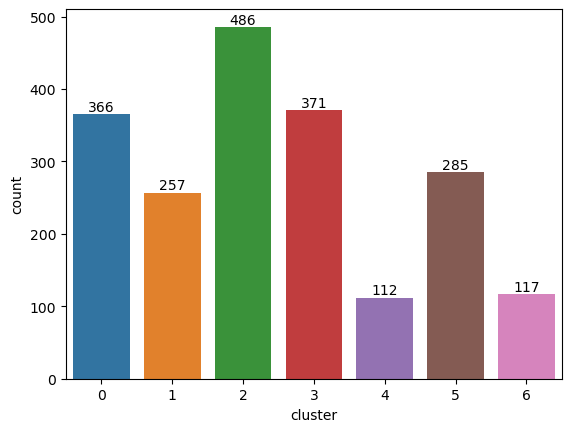

In [34]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

In [35]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [36]:
link_data=linkage(x,method="ward", metric="euclidean")

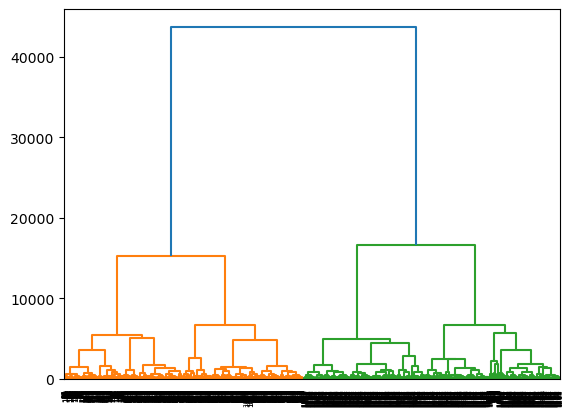

In [37]:
dendrogram(link_data)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [40]:
labels=model.labels_

In [41]:
from sklearn import metrics

In [42]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[clusters.core_sample_indices_]=True

In [43]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(x,labels))

0.41702456181050895


In [44]:
from yellowbrick.cluster import KElbowVisualizer

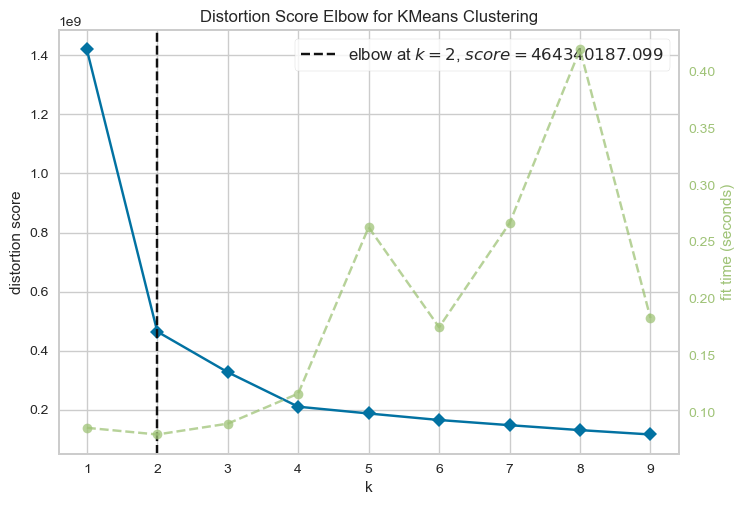

In [45]:
model = KMeans(random_state=42)


visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x)


visualizer.show()
plt.show()